# PCA on IRIS dataset
Filippo Fantinato 2041620

On this notebook I applied PCA to extract 2 principal components on the IRIS dataset. Just for the love of fun I tried three scalers: Standard Scaler, Min Max Scaler and Normalizer Scaler.

Afterwards I applied PCA to extract 3 principal components in order to study the variance according to each principal component.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's define a method which given a datset, a generic scaler and the column to drop, returns the 2 principal components for each entry.

In [ ]:
def apply_pca2(dataset, scaler, column):
  X = dataset.drop(columns = [column], axis = 1)
  X_scale = scaler.fit_transform(X)
  pca = PCA(n_components=2)

  dataset_pca = pd.DataFrame(pca.fit_transform(X_scale))
  dataset_pca.columns = ['pc1', 'pc2']
  dataset_pca[column] = dataset[column]
  return dataset_pca

Let's define the labels and the corresponding colors and the method to plot the pca with 2 principal components.

In [ ]:
labels = ['setosa', 'versicolor', 'virginica']
colors = ['coral', 'sandybrown', 'cornflowerblue']

In [ ]:
def plot_pca2(iris_pca, column, title):
  for label, color in zip(labels, colors):
    x = iris_pca['pc1'][iris_pca[column] == label]
    y = iris_pca['pc2'][iris_pca[column] == label]
    plt.scatter(x, y,  c=color, label=label)
  
  plt.legend()
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(title)
  plt.show()

## Standard Scaler

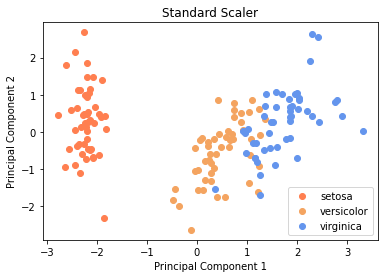

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [ ]:
iris_pca_standardscaler = apply_pca2(iris, StandardScaler(), column = 'species')
plot_pca2(
    iris_pca_standardscaler,
    column = 'species', 
    title='Standard Scaler'
  )
iris_pca_standardscaler

## Min Max Scaler

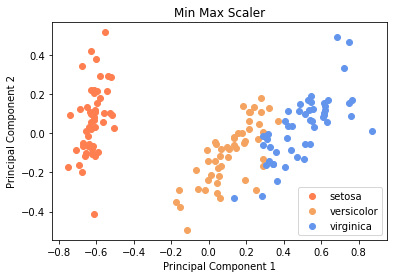

,pc1,pc2,species
0,-0.630703,0.107578,setosa
1,-0.622905,-0.104260,setosa
2,-0.669520,-0.051417,setosa
3,-0.654153,-0.102885,setosa
4,-0.648788,0.133488,setosa
...,...,...,...
145,0.551462,0.059841,virginica
146,0.407146,-0.171821,virginica
147,0.447143,0.037560,virginica
148,0.488208,0.149678,virginica


In [ ]:
iris_pca_minmaxscaler = apply_pca2(iris, MinMaxScaler(), column = 'species')
plot_pca2(
    iris_pca_minmaxscaler,
    column = 'species',
    title='Min Max Scaler'
  )
iris_pca_minmaxscaler

## Normalizer Scaler

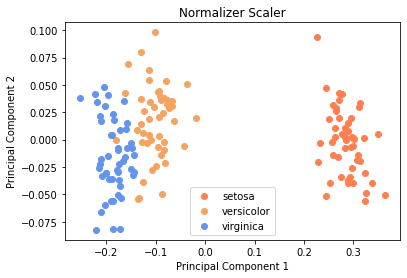

,pc1,pc2,species
0,0.301637,0.000716,setosa
1,0.270921,0.042354,setosa
2,0.297679,0.002407,setosa
3,0.262666,0.002667,setosa
4,0.307469,-0.018719,setosa
...,...,...,...
145,-0.165452,-0.019962,virginica
146,-0.185297,0.018296,virginica
147,-0.162955,-0.016189,virginica
148,-0.172977,-0.081485,virginica


In [ ]:
iris_pca_normalizer = apply_pca2(iris, Normalizer(), column = 'species')
plot_pca2(
    iris_pca_normalizer,
    column = 'species',
    title='Normalizer Scaler'
  )
iris_pca_normalizer

## 3 Principal Components

In [ ]:
X = iris.drop(columns = ['species'], axis = 1)
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
pca3 = PCA(n_components=3)

iris_pca3 = pd.DataFrame(pca3.fit_transform(X_scale))
iris_pca3.columns = ['pc1', 'pc2', 'pc3']
iris_pca3['species'] = iris['species']
iris_pca3

,pc1,pc2,pc3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


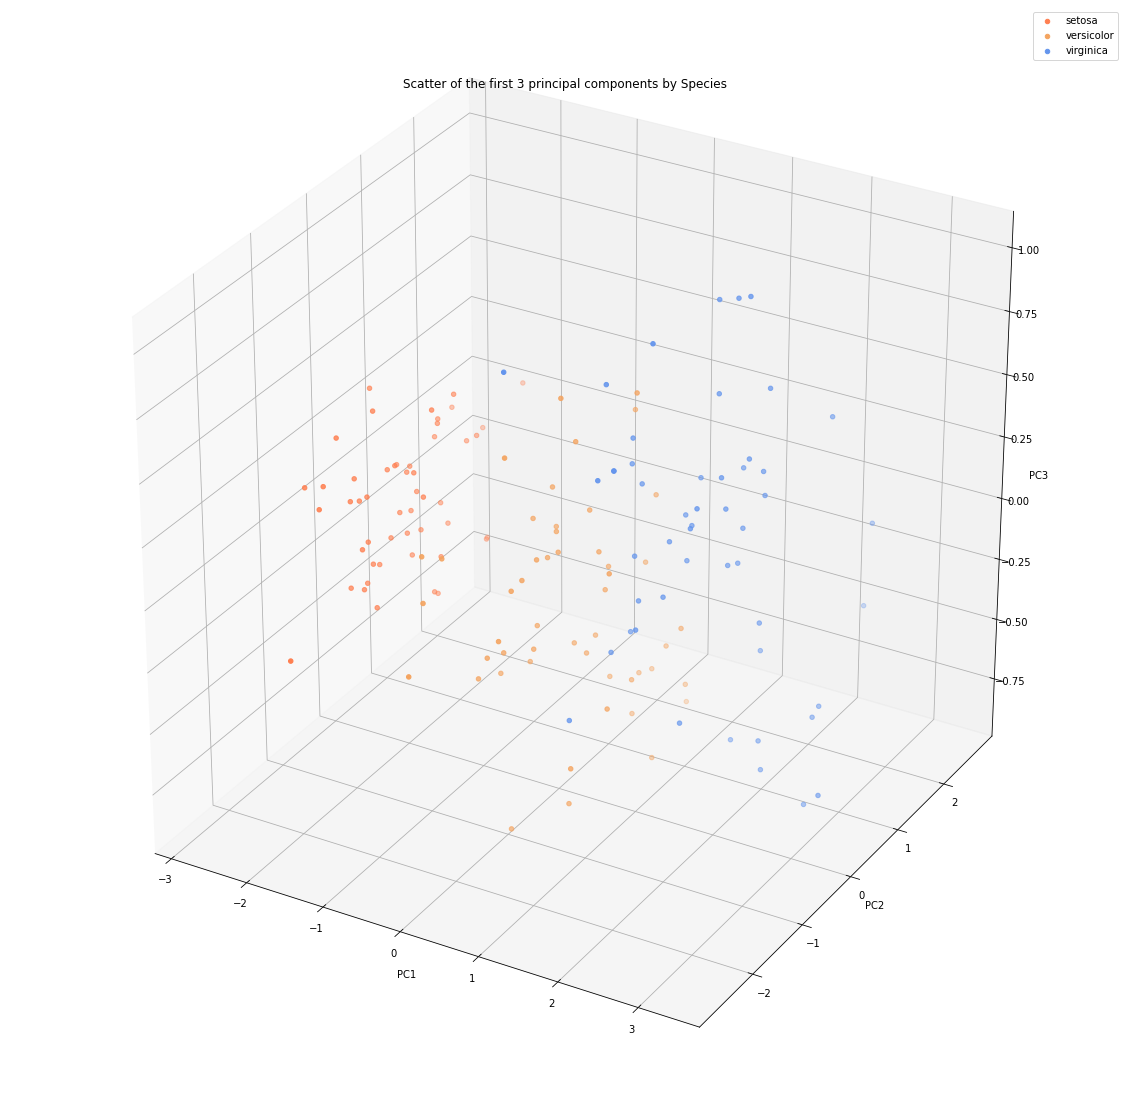

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(labels, colors):
  x = iris_pca3['pc1'][iris_pca3['species'] == label]
  y = iris_pca3['pc2'][iris_pca3['species'] == label]
  z = iris_pca3['pc3'][iris_pca3['species'] == label]
  ax.scatter(x,y,z,  c=color, label=label)
  
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title ('Scatter of the first 3 principal components by Species')
ax.legend()
plt.show()

As can be seen from the following graph, the first principal component is enough to explain 95% of the variance, while adding the second one they cover almost all the variance.

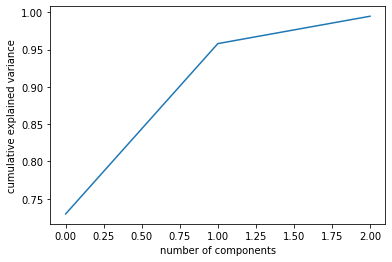

In [ ]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()